In [57]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [58]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [59]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [92]:
#SIGN UP DATE AND TRANSACTION DATE MISMATCH FOR 191 TRANSACTIONS
#SINCE THIS IS A SIGNIFICANT NUMBER FOR THE DATASET (191 OUT OF 1000) NOT DROPPING THOSE ROWS
#ASSUMED SIGNUP DATE AS THE TRANSACTION DATE FOR THOSE TRANSACTIONS

Revenue by Region:
          Region  TotalValue
3  South America   219352.56
1         Europe   166254.63
2  North America   152313.40
0           Asia   152074.97

Transaction Counts by Region:
          Region  TransactionCount
0  South America               304
1  North America               244
2         Europe               234
3           Asia               218

Customer Counts by Region:
          Region  CustomerCount
0           Asia             44
1         Europe             50
2  North America             46
3  South America             59


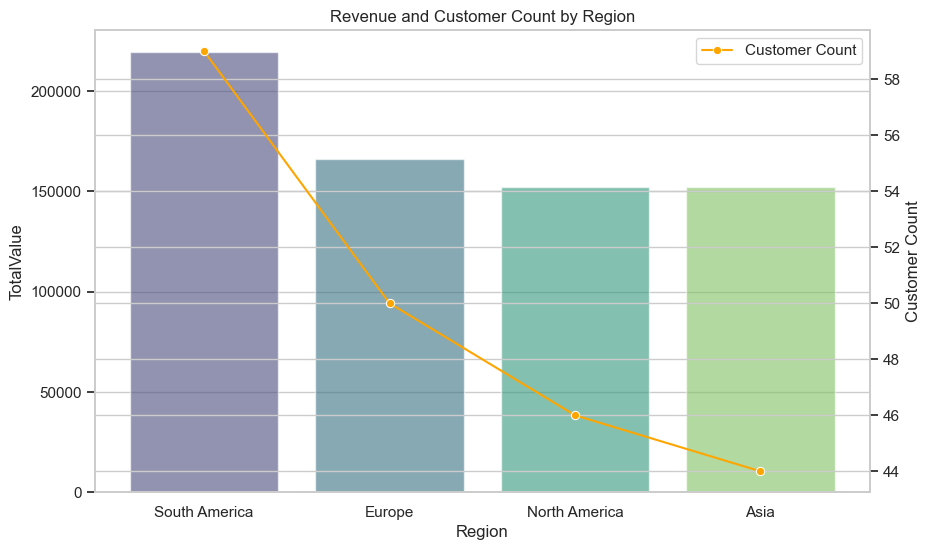

Combined Data by Region:
          Region  TotalValue  TransactionCount  CustomerCount
0  South America   219352.56               304             59
1         Europe   166254.63               234             50
2  North America   152313.40               244             46
3           Asia   152074.97               218             44


In [89]:
trans_cust = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
region_revenue = trans_cust.groupby('Region')['TotalValue'].sum().reset_index().sort_values(by='TotalValue', ascending=False)
region_counts = trans_cust['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'TransactionCount']
region_customers = trans_cust.groupby('Region')['CustomerID'].nunique().reset_index()
region_customers.columns = ['Region', 'CustomerCount']

print("Revenue by Region:")
print(region_revenue)
print("\nTransaction Counts by Region:")
print(region_counts)
print("\nCustomer Counts by Region:")
print(region_customers)

combined_data = region_revenue.merge(region_customers, on='Region')



plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data, x='Region', y='TotalValue', palette='viridis', label='Revenue (USD)', alpha=0.6)
ax2 = plt.gca().twinx()
sns.lineplot(data=combined_data, x='Region', y='CustomerCount', marker='o', color='orange', ax=ax2, label='Customer Count')
plt.title('Revenue and Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
ax2.set_ylabel('Customer Count')
plt.xticks(rotation=45)

# Add legends to the plot
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


combined_data = region_revenue.merge(region_counts, on='Region').merge(region_customers, on='Region')

# Print the combined data table
print("Combined Data by Region:")
print(combined_data)

In [61]:
order_stats = transactions['TotalValue'].describe()
print("Overall Order Value Statistics:")
print(order_stats)

order_threshold = transactions['TotalValue'].quantile(0.67)
top_orders = transactions[transactions['TotalValue'] >= order_threshold]
top_orders_value = top_orders['TotalValue'].sum()
percentage_top_orders = (top_orders_value / transactions['TotalValue'].sum()) * 100

print("\nTop 33% Orders Threshold: {:.2f}".format(order_threshold))
print("Revenue from Top 33% Orders: ${:,.2f}".format(top_orders_value))
print("Percentage Contribution: {:.2f}%".format(percentage_top_orders))

Overall Order Value Statistics:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

Top 33% Orders Threshold: 894.68
Revenue from Top 33% Orders: $427,317.47
Percentage Contribution: 61.93%


Monthly Sales Summary:
    Month  TransactionCount  TotalRevenue
0       1               107      66376.39
1       2                77      51459.27
2       3                80      47828.73
3       4                86      57519.06
4       5                86      64527.74
5       6                69      48771.18
6       7                96      71366.39
7       8                94      63436.74
8       9                96      70603.75
9      10                70      47063.22
10     11                57      38224.37
11     12                82      62818.72


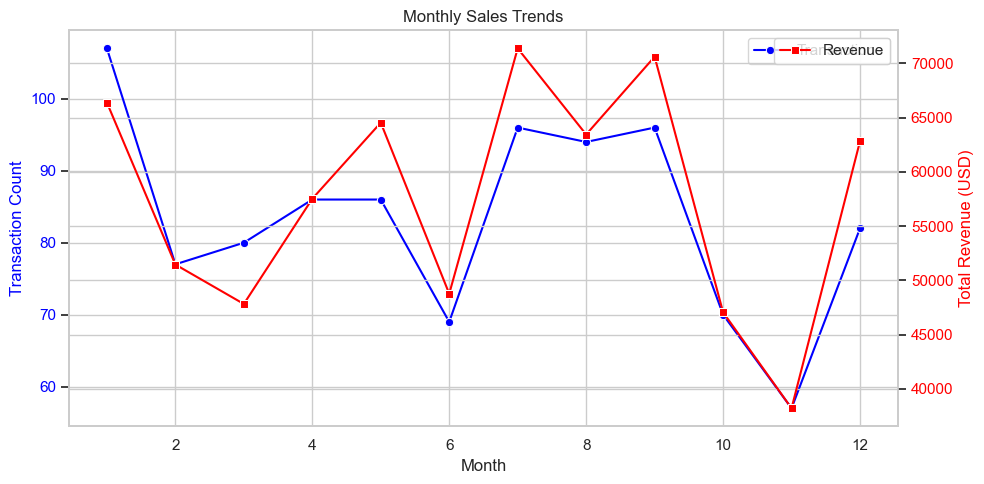

In [62]:
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Year'] = transactions['TransactionDate'].dt.year

monthly_sales = transactions.groupby('Month').agg({
    'TransactionID': 'nunique',
    'TotalValue': 'sum'
}).reset_index()
monthly_sales.columns = ['Month', 'TransactionCount', 'TotalRevenue']

print("Monthly Sales Summary:")
print(monthly_sales)

fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TransactionCount', marker='o', ax=ax1, label='Transactions', color='blue')
ax1.set_ylabel('Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Month', y='TotalRevenue', marker='s', ax=ax2, label='Revenue', color='red')
ax2.set_ylabel('Total Revenue (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
fig.tight_layout()
plt.show()

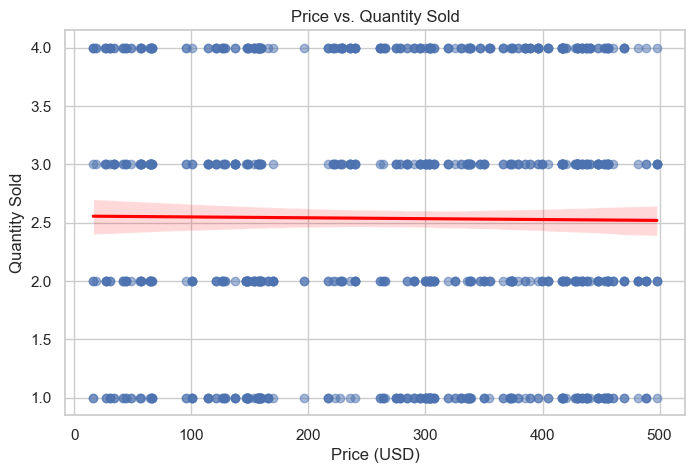

Pearson Correlation between Price and Quantity Sold: -0.01


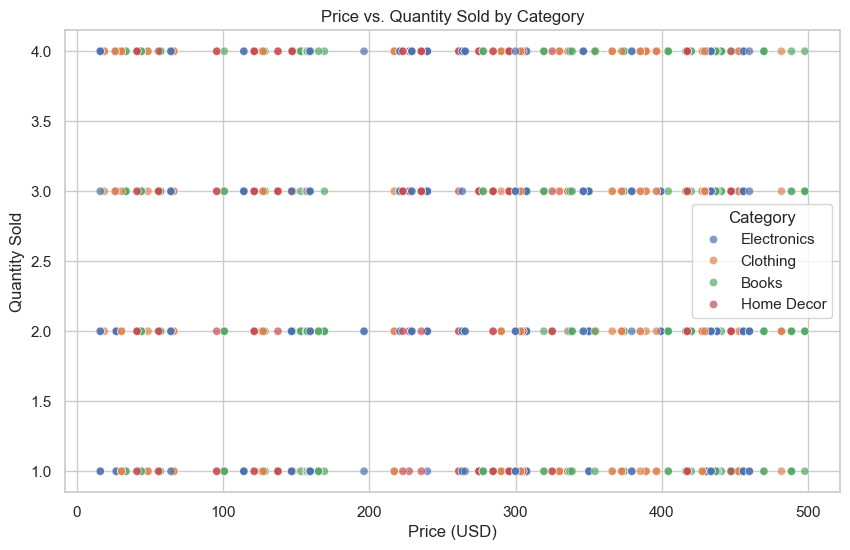

In [63]:
plt.figure(figsize=(8, 5))
sns.regplot(data=transactions, x='Price', y='Quantity', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()

corr = transactions[['Price', 'Quantity']].corr().iloc[0, 1]
print("Pearson Correlation between Price and Quantity Sold: {:.2f}".format(corr))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=trans_prod, x='Price', y='Quantity', hue='Category', alpha=0.7)
plt.title('Price vs. Quantity Sold by Category')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.legend(title='Category')
plt.show()

In [64]:
cust_txn_count = transactions.groupby('CustomerID').size()
repeat_customers = cust_txn_count[cust_txn_count > 1].count()
repeat_percentage = (repeat_customers / customers['CustomerID'].nunique()) * 100

print("Repeat Purchase Percentage: {:.2f}%".format(repeat_percentage))

customer_ltv = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_ltv = customer_ltv.merge(customers[['CustomerID', 'SignupDate']], on='CustomerID', how='left')

cutoff_date = pd.to_datetime("2023-01-01")
early_signups = customer_ltv[customer_ltv['SignupDate'] < cutoff_date]
recent_signups = customer_ltv[customer_ltv['SignupDate'] >= cutoff_date]

print("\nAverage Lifetime Value:")
print("Early Signups (< {}): ${:.2f}".format(cutoff_date.date(), early_signups['TotalValue'].mean()))
print("Recent Signups (>= {}): ${:.2f}".format(cutoff_date.date(), recent_signups['TotalValue'].mean()))


Repeat Purchase Percentage: 93.50%

Average Lifetime Value:
Early Signups (< 2023-01-01): $3528.75
Recent Signups (>= 2023-01-01): $3438.19


In [65]:
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='TotalValue', ascending=False)
customer_revenue['Rank'] = customer_revenue['TotalValue'].rank(method='first', ascending=False)

cutoff_index = int(0.33 * len(customer_revenue))
high_value_customers = customer_revenue.head(cutoff_index)

print("Number of High-Value Customers: {} (approx. 33% of total)".format(high_value_customers.shape[0]))

last_txn = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_txn.columns = ['CustomerID', 'LastTransactionDate']
customer_revenue = customer_revenue.merge(last_txn, on='CustomerID', how='left')
customer_revenue['DaysSinceLast'] = (datetime.now() - customer_revenue['LastTransactionDate']).dt.days

hv_recency = high_value_customers.merge(customer_revenue[['CustomerID', 'DaysSinceLast']], on='CustomerID', how='left')

print("\nHigh-Value Customer Recency (days since last transaction):")
print(hv_recency.describe())

Number of High-Value Customers: 65 (approx. 33% of total)

High-Value Customer Recency (days since last transaction):
         TotalValue      Rank  DaysSinceLast
count     65.000000  65.00000      65.000000
mean    5598.756923  33.00000      90.938462
std     1129.025677  18.90767      48.033152
min     4251.560000   1.00000      35.000000
25%     4802.240000  17.00000      48.000000
50%     5377.830000  33.00000      82.000000
75%     6044.630000  49.00000     123.000000
max    10673.870000  65.00000     268.000000


In [66]:
transactions['Week'] = transactions['TransactionDate'].dt.to_period('W').apply(lambda r: r.start_time)

basket_data_week = transactions.groupby(['CustomerID', 'Week'])['ProductID'].apply(list).reset_index(name='Products')

basket_data_week = basket_data_week[basket_data_week['Products'].apply(lambda x: len(x) > 1)]
print("Number of weekly baskets with >1 product:", basket_data_week.shape[0])

from sklearn.preprocessing import MultiLabelBinarizer
mlb_week = MultiLabelBinarizer()
basket_encoded_week = pd.DataFrame(mlb_week.fit_transform(basket_data_week['Products']),
                                   columns=mlb_week.classes_,
                                   index=basket_data_week.index)
print("Weekly basket one-hot encoded sample:")
print(basket_encoded_week.head())

# Apply Apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets_week = apriori(basket_encoded_week, min_support=0.01, use_colnames=True)
print("Frequent itemsets from weekly baskets (sample):")
print(frequent_itemsets_week.sort_values(by='support', ascending=False).head())

rules_week = association_rules(frequent_itemsets_week, metric="lift", min_threshold=1)
print("Association Rules (Top 5) from weekly baskets:")
print(rules_week.sort_values(by='lift', ascending=False).head())

Number of weekly baskets with >1 product: 36
Weekly basket one-hot encoded sample:
     P003  P004  P006  P007  P008  P010  P011  P013  P016  P017  ...  P075  \
37      0     0     0     0     0     0     0     0     0     0  ...     0   
41      0     0     0     0     0     0     0     0     0     0  ...     0   
126     0     0     0     0     0     0     0     0     0     0  ...     0   
131     0     0     0     0     0     0     0     0     0     0  ...     0   
159     0     0     0     0     0     0     0     0     0     0  ...     0   

     P076  P081  P083  P084  P086  P087  P096  P097  P100  
37      0     0     0     0     0     0     0     0     0  
41      0     0     0     0     0     0     0     0     0  
126     0     0     0     1     0     0     1     0     0  
131     0     0     0     0     0     0     0     0     0  
159     0     0     0     0     0     1     0     0     0  

[5 rows x 53 columns]
Frequent itemsets from weekly baskets (sample):
     support item

In [68]:
last_transaction = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_transaction.columns = ['CustomerID', 'LastTransactionDate']
churn_threshold = transactions['TransactionDate'].max() - pd.DateOffset(months=6)
churned_customers = last_transaction[last_transaction['LastTransactionDate'] < churn_threshold]
churn_rate = (len(churned_customers) / customers['CustomerID'].nunique()) * 100
print("Churn Rate (inactive for 6+ months): {:.2f}%".format(churn_rate))


Churn Rate (inactive for 6+ months): 6.50%


In [79]:
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.dayofweek

sales_by_day = transactions.groupby('DayOfWeek')['TotalValue'].sum().reset_index()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['DayOfWeek'] = sales_by_day['DayOfWeek'].map(dict(zip(range(7), days)))

print(sales_by_day)

   DayOfWeek  TotalValue
0     Monday   101984.33
1    Tuesday   108567.61
2  Wednesday   119203.15
3   Thursday    99202.71
4     Friday    87032.09
5   Saturday    81399.74
6     Sunday    92605.93


In [77]:
merged_data = transactions.merge(customers, on='CustomerID')

customer_sales = merged_data.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()

threshold = customer_sales['TotalValue'].quantile(0.9)
high_value_customers = customer_sales[customer_sales['TotalValue'] >= threshold]

high_value_by_region = high_value_customers.groupby('Region')['TotalValue'].sum().reset_index()

print(high_value_by_region)

          Region  TotalValue
0           Asia    33136.92
1         Europe    16823.65
2  North America    28321.85
3  South America    59497.22


In [78]:
threshold_low = customer_sales['TotalValue'].quantile(0.1)
low_value_customers = customer_sales[customer_sales['TotalValue'] <= threshold_low]

low_value_by_region = low_value_customers.groupby('Region')['TotalValue'].sum().reset_index()

print(low_value_by_region)

          Region  TotalValue
0           Asia     4987.41
1         Europe     3203.87
2  North America     1451.39
3  South America     3558.76


In [75]:
products = pd.read_csv('Products.csv')

product_sales = transactions.merge(products, on='ProductID')

product_revenue = product_sales.groupby('ProductName')['TotalValue'].sum().reset_index()

total_revenue = product_revenue['TotalValue'].sum()
product_revenue['RevenuePercentage'] = (product_revenue['TotalValue'] / total_revenue) * 100

top_products = product_revenue.sort_values(by='RevenuePercentage', ascending=False)

print(top_products.head(10))  # Top 10 products

                ProductName  TotalValue  RevenuePercentage
9     ActiveWear Smartwatch    39096.97           5.666264
47     SoundWave Headphones    25211.64           3.653884
52          SoundWave Novel    24507.90           3.551892
4         ActiveWear Jacket    22712.56           3.291697
6            ActiveWear Rug    22314.43           3.233996
58       TechPro Headphones    19513.80           2.828105
15       BookWorld Cookbook    19221.99           2.785814
21        BookWorld Sweater    18743.79           2.716509
64         TechPro Textbook    18267.96           2.647547
2   ActiveWear Cookware Set    18083.73           2.620847


In [90]:
merged_data = transactions.merge(customers, on="CustomerID")

customer_orders = merged_data.groupby(["CustomerID", "Region"]).agg(
    total_orders=("TransactionID", "count"),
    total_money_spent=("TotalValue", "sum")
).reset_index()

top_customers_by_orders = customer_orders.nlargest(10, "total_orders")  # Change 10 to any number you want
print("Top Customers by Number of Orders:")
print(top_customers_by_orders)

top_customers_by_spent = customer_orders.nlargest(10, "total_money_spent")  # Change 10 to any number you want
print("\nTop Customers by Money Spent:")
print(top_customers_by_spent)


Top Customers by Number of Orders:
    CustomerID         Region  total_orders  total_money_spent
108      C0109  North America            11            5487.25
155      C0156  North America            11            7634.45
7        C0008  North America            10            4271.61
64       C0065  North America            10            7663.70
140      C0141         Europe            10           10673.87
174      C0175           Asia            10            6210.53
74       C0075         Europe             9            5848.97
83       C0084           Asia             9            4441.10
92       C0093           Asia             9            5294.99
146      C0147  South America             9            2948.44

Top Customers by Money Spent:
    CustomerID         Region  total_orders  total_money_spent
140      C0141         Europe            10           10673.87
53       C0054           Asia             8            8040.39
64       C0065  North America            10         